# Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.

- Boosting is a machine learning technique that combines multiple weak learners into a single, strong model by training them sequentially. It improves weak learners by iteratively focusing on the errors made by previous models, giving more weight to misclassified instances in subsequent steps. This process continues until the desired level of accuracy is reached, transforming simple, flawed models into a powerful predictor.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

- AdaBoost and Gradient Boosting differ in how they handle errors: AdaBoost increases the weights of misclassified samples to make the next model focus on them, while Gradient Boosting fits new models to the residuals (errors) of the previous ensemble. Additionally, AdaBoost uses weak learners like decision stumps and weights their final contribution based on performance, whereas Gradient Boosting can use more complex learners and adds them to the ensemble in a greedy, forward, stage-wise manner to minimize a specific loss function.

3. How does regularization help in XGBoost?

- Regularization in XGBoost primarily helps to prevent overfitting and improve the generalization ability of the model. XGBoost, being a powerful tree-boosting algorithm, can easily overfit the training data if not properly regularized, especially with complex trees or noisy datasets.

4. Why is CatBoost considered efficient for handling categorical data?

- CatBoost handles categorical data efficiently by using its Ordered Target Encoding and Ordered Boosting techniques to prevent target leakage, and by using oblivious (symmetric) trees that simplify splits and speed up training. These innovations allow CatBoost to natively process categorical features, reducing the need for manual pre-processing and often improving model performance compared to other methods that rely on one-hot encoding or require manual preprocessing.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?

- Boosting is preferred in real-world applications where a high degree of accuracy is needed to reduce bias, particularly in complex tasks like fraud detection, customer churn prediction, and financial forecasting. Boosting works by sequentially building models that focus on the mistakes of previous models, making it effective for problems with a complex underlying relationship that bagging, which primarily reduces variance, may not handle as well.

Applications favoring boosting

Fraud detection: Boosting models can achieve high accuracy in identifying complex patterns of fraudulent activity, especially when dealing with massive datasets.

Customer churn prediction: The sequential nature of boosting allows it to learn from the data to accurately predict which customers are most likely to leave.

Financial forecasting and pricing: Boosting can be used in finance to build highly accurate models for tasks like stock market prediction and the pricing of complex financial products.

Image recognition: In scenarios like identifying cats in images, boosting can combine simple, weak learners (e.g., a weak learner that looks for pointy ears and another that looks for cat-shaped eyes) into a strong, accurate classifier, as explained by Amazon Web Services (AWS).


Why boosting is preferred in these cases

Reduces bias: Boosting focuses on reducing bias by sequentially training models that focus on the errors of the previous ones, making it ideal for complex problems.

High accuracy: By iteratively improving on previous models, boosting often achieves higher predictive accuracy than bagging, though it requires more careful tuning to avoid overfitting.

Handles complex data: Boosting is particularly effective on datasets with relatively few predictors but complex relationships between them.
When bagging might be a better choice

Improves stability: Bagging reduces variance and is great for unstable models, making it effective when the goal is to improve model stability rather than just accuracy.

Handles high-variance models: Applications like Random Forests use bagging to effectively handle high-variance, low-bias models.

Reduces overfitting: Bagging's parallel training approach is robust to overfitting, which is useful when the primary concern is preventing the model from fitting too closely to the training data




In [1]:
#6. Write a Python program to:
#Train an AdaBoost Classifier on the Breast Cancer dataset
#Print the model accuracy

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)


model = abc.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Model Accuracy: {accuracy:.4f}")


AdaBoost Classifier Model Accuracy: 0.9708


In [2]:
#7. Write a Python program to:
#Train a Gradient Boosting Regressor on the California Housing dataset
#Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)


y_pred = gbr.predict(X_test)


r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor R-squared score: {r2:.4f}")


Gradient Boosting Regressor R-squared score: 0.7756


In [3]:
#8. Write a Python program to:
#Train an XGBoost Classifier on the Breast Cancer dataset
#Tune the learning rate using GridSearchCV
#Print the best parameters and accuracy

import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)


param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)


y_pred = best_xgb_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {test_accuracy:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'learning_rate': 0.2}
Best cross-validation accuracy: 0.9670
Test set accuracy with best parameters: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:32:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [4]:
#9. Write a Python program to:
#Train a CatBoost Classifier
#Plot the confusion matrix using seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)


X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y_series = pd.Series(y, name='target')


X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.2, random_state=42)


model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


ModuleNotFoundError: No module named 'catboost'

In [5]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


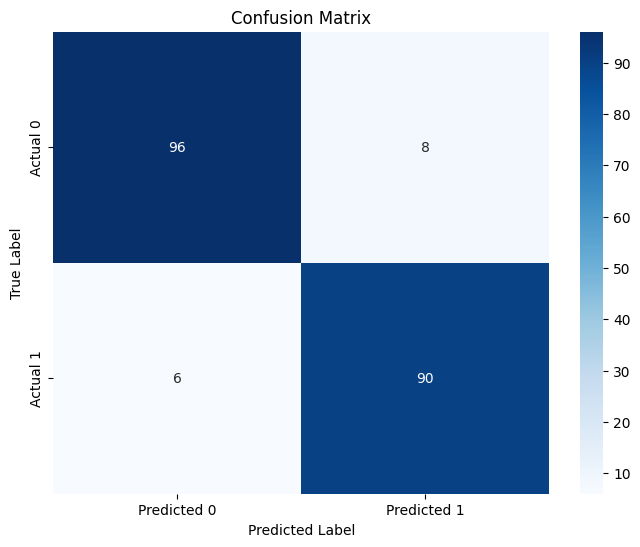

Accuracy: 0.9300


In [6]:
#9. Write a Python program to:
#Train a CatBoost Classifier
#Plot the confusion matrix using seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)


X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y_series = pd.Series(y, name='target')


X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.2, random_state=42)


model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:

Data preprocessing & handling missing/categorical values

Choice between AdaBoost, XGBoost, or CatBoost

Hyperparameter tuning strategy

Evaluation metrics you'd choose and why

How the business would benefit from your model



A step-by-step data science pipeline for predicting loan defaults using boosting techniques on an imbalanced dataset with missing values and mixed features is described below.

1. Data Preprocessing & Handling Missing/Categorical Values

The preprocessing stage focuses on data cleaning, feature engineering, and addressing the class imbalance issue.

Data Cleaning and Feature Engineering: Conduct exploratory data analysis (EDA) to understand data distributions, outliers, and correlations. Create relevant features from existing data (e.g., debt-to-income ratio, loan-to-income ratio, age of credit history).

Handling Missing Values:

For XGBoost and LightGBM, missing values can be left as NaN (the default), as these algorithms have a sparsity-aware split finding and can learn the best direction for a split when a value is missing.

For CatBoost, missing values need to be explicitly imputed or handled, as it cannot handle them natively in all scenarios. Imputation methods like mean/median for numerical features and mode for categorical features can be used.

Handling Categorical Values:

XGBoost requires categorical features to be converted to numeric format, typically using one-hot encoding for low cardinality features or other methods like target encoding for high cardinality features.

LightGBM supports categorical features natively if they are integer-encoded and specified using a cat_features parameter.

CatBoost has superior native handling of categorical features using an efficient ordered target encoding method, which helps prevent data leakage and improves performance.

Handling Imbalance: The target variable (loan default) is highly imbalanced. This can be addressed using a combination of methods:

Resampling Techniques: Employ synthetic oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN on the training data.

Class Weighting: Utilize the scale_pos_weight parameter in XGBoost or similar class weights in other models during model training to give more importance to the minority (default) class.

2. Choice Between AdaBoost, XGBoost, or CatBoost

CatBoost or XGBoost are the recommended choices over AdaBoost for this problem.

CatBoost is an excellent choice due to its state-of-the-art handling of categorical features natively, which can be a significant advantage given the dataset description. It often requires less extensive preprocessing for these features.

XGBoost is a highly efficient, regularized gradient boosting framework known for its speed and performance, making it a popular choice in FinTech and Kaggle competitions.

AdaBoost is generally less performant than modern gradient boosting methods like XGBoost or CatBoost for complex, large datasets with mixed data types.

The final choice between CatBoost and XGBoost would depend on empirical testing (performance, training time, memory usage) on the specific dataset.

3. Hyperparameter Tuning Strategy

Hyperparameter tuning is crucial for optimizing the performance of boosting models, especially with imbalanced data.

Tuning Method: Use advanced search techniques like Random Search or Bayesian Optimization to efficiently explore the hyperparameter space, as a full Grid Search can be computationally expensive.

Cross-Validation: Implement k-fold cross-validation on the training data to ensure robust model evaluation and to prevent overfitting to a single train/validation split.

Key Parameters to Tune:

Class Imbalance: Tune scale_pos_weight (XGBoost/LightGBM) or class weights (CatBoost) to find the optimal balance between precision and recall for the minority class.

Tree Complexity: Parameters like max_depth, num_leaves, min_child_weight (or similar in other libraries) control tree complexity and help prevent overfitting.

Regularization: Tune L1 (reg_alpha) and L2 (reg_lambda) regularization terms to make the model more conservative.

Learning Rate and Number of Estimators: Tune learning_rate and n_estimators (or num_boost_round) to balance training speed and model performance.

4. Evaluation Metrics You'd Choose and Why

Accuracy is misleading for imbalanced datasets. The following metrics should be used:

Precision-Recall AUC (PR-AUC): This is the primary metric because it focuses on the performance of the positive (default) class, which is rare but critical to identify.

F1-Score (or F-beta score): The F1-score provides a harmonic mean of precision and recall. A business may prioritize recall over precision (e.g., higher penalty for missing a default than for a false alarm), in which case an F2-score would be more appropriate.

ROC AUC: While PR-AUC is preferred for severe imbalance, ROC AUC still offers a good overall measure of the model's ability to distinguish between classes across all possible thresholds and is widely used for comparison.

Confusion Matrix: Used to understand the raw counts of True Positives, True Negatives, False Positives, and False Negatives to inform business decisions on the classification threshold.

5. How the Business Would Benefit from Your Model

The model provides significant business value by enabling proactive risk management and informed decision-making.

Improved Risk Management: Accurately identifying potential defaulters early allows the company to intervene, offer modified payment plans, or deny loans to high-risk applicants, thereby reducing financial losses.
Enhanced Profitability: By minimizing loan defaults and managing risk effectively, the company can optimize its loan portfolio and ensure financial stability.

Automated and Consistent Decisions: The model provides a consistent, data-driven approach to loan approvals, reducing human bias and improving operational efficiency.

Optimized Resource Allocation: The business can focus collection efforts on the accounts most likely to default, rather than treating all overdue accounts the same way.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, roc_auc_score, confusion_matrix, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
# from imblearn.over_sampling import SMOTE # Uncomment if using SMOTE instead of class weights
# from imblearn.pipeline import Pipeline as ImbPipeline # Uncomment if using ImbPipeline

# --- 1. Data Preprocessing & Handling Missing/Categorical Values ---

def preprocess_data(df):
    if 'loan_default' not in df.columns:
        raise ValueError("DataFrame must contain a 'loan_default' column.")

    X = df.drop('loan_default', axis=1)
    y = df['loan_default']

    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    numeric_transformer = SimpleImputer(strategy='median')

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough'
    )

    return X, y, preprocessor

# --- 2. Choice between AdaBoost, XGBoost, or CatBoost ---

def get_model():
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    return model

# --- 3. Hyperparameter Tuning Strategy ---

def tune_hyperparameters(X_train_processed, y_train):
    param_dist = {
        'n_estimators': [100, 200, 300], # Added example values
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7], # Added example values
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
    }

    pipeline = Pipeline([
        ('model', get_model())
    ])

    pr_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=10,
        scoring=pr_auc_scorer,
        cv=skf,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train_processed, y_train)
    return random_search.best_estimator_

# --- 4. Evaluation Metrics ---

def evaluate_model(model, X_test_processed, y_test):
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

# --- Main script ---

if __name__ == '__main__':
    try:
        data = {
            'feature1': np.random.rand(500),
            'feature2': np.random.choice(['A', 'B', 'C'], 500),
            'loan_default': np.random.choice([0, 1], 500, p=[0.9, 0.1])
        }
        loan_data = pd.DataFrame(data)
        loan_data.iloc[10:50, 0] = np.nan
    except Exception as e:
        print(f"Error creating dummy data: {e}")
        exit()

    X, y, preprocessor = preprocess_data(loan_data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("Starting hyperparameter tuning...")
    best_model_pipeline = tune_hyperparameters(X_train_processed, y_train)
    print("Tuning complete.")
    print(f"Best parameters found: {best_model_pipeline.named_steps['model'].get_params()}")

    print("\nEvaluating the best model on test data...")
    evaluate_model(best_model_pipeline, X_test_processed, y_test)

Starting hyperparameter tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning complete.
Best parameters found: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 10.428571428571429, 'subsample': 1.0,

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:45:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
